## Carbon Emissions Demo

1. Date: 10/31/2019
2. Owner: Victoria Hunt

In [1]:
from postreise.analyze import carbon
from powersimdata.scenario.scenario import Scenario
from postreise.plot import plot_carbon_map, plot_carbon_bar

In [2]:
s224 = Scenario('224') 

SCENARIO: base | WACA_Anchor_AllMatchCA_2030_SpurUpgrade_OB_5_Mesh100x5

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [3]:
s87 = Scenario('87') 

SCENARIO: base | WesternBase_2016_noHVDC_Final_2019Sep

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [4]:
grid224 = s224.state.get_grid()
grid87 = s87.state.get_grid()

In [5]:
carbon224_by_bus = carbon.summarize_carbon_by_bus(carbon.generate_carbon_stats(s224), grid224.plant)
carbon87_by_bus = carbon.summarize_carbon_by_bus(carbon.generate_carbon_stats(s87), grid87.plant)


--> Loading PG
--> Loading PG


In [6]:
busmap224 = plot_carbon_map.combine_bus_info_and_emission(grid224.bus, carbon224_by_bus)
busmap87 = plot_carbon_map.combine_bus_info_and_emission(grid87.bus, carbon87_by_bus)


In [7]:
plot_carbon_map.map_carbon_emission(busmap224, 'AllMatchCA 2030')


Loading BokehJS ...

In [8]:
_ = plot_carbon_map.map_carbon_emission_comparison(busmap87,  busmap224)


Loading BokehJS ...

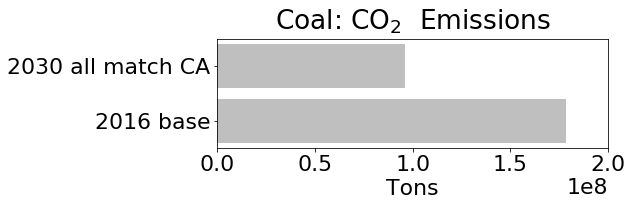

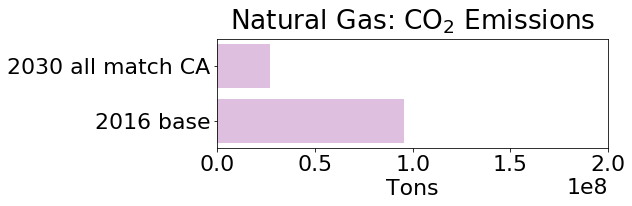

In [9]:
plot_carbon_bar.plot_carbon_bar(carbon87_by_bus, carbon224_by_bus, '2016 base', '2030 all match CA')


In [10]:
plot_carbon_bar.print_carbon_diff(carbon87_by_bus, carbon224_by_bus)


55%
